In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [37]:
import re
import nltk
#nltk.download()
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
selected_df["Translated_Review"] = selected_df["Translated_Review"].apply(clean)app_df=pd.read_csv('apps.csv')

In [4]:
new_app_df=app_df.drop_duplicates()

In [5]:
print('Total number of apps in the dataset=',new_app_df.count())

Total number of apps in the dataset= Unnamed: 0        9659
App               9659
Category          9659
Rating            8196
Reviews           9659
Size              8432
Installs          9659
Type              9658
Price             9659
Content Rating    9659
Genres            9659
Last Updated      9659
Current Ver       9651
Android Ver       9657
dtype: int64


In [6]:
n=int(input("Enter the Number of Samples User Wants : "))
new_app_df.sample(n)

Enter the Number of Samples User Wants : 10


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7986,9105,Météo Algérie DZ,WEATHER,4.1,1238,4.7M,"100,000+",Free,0,Everyone,Weather,"December 17, 2014",1.1.6,2.3 and up
4193,5144,AH Alarm Panel,TOOLS,3.9,7,0.081,100+,Paid,$4.99,Everyone,Tools,"May 12, 2011",1.2.0,1.5 and up
2374,3038,GolfLogix GPS + Putt Breaks,SPORTS,4.0,11085,61M,"1,000,000+",Free,0,Everyone,Sports,"June 21, 2018",8.9.3,4.0.3 and up
1590,2037,Toca Kitchen 2,FAMILY,4.5,1014822,56M,"50,000,000+",Free,0,Everyone,Educational;Pretend Play,"June 29, 2017",1.2.3-play,4.1 and up
2858,3615,Classical music for baby,PARENTING,4.8,1940,38M,"100,000+",Free,0,Everyone,Parenting;Music & Video,"July 18, 2018",1.04,4.2 and up
7105,8173,Ghost Detector,FAMILY,3.5,35337,7.4M,"5,000,000+",Free,0,Teen,Entertainment,"May 25, 2018",1.7.28,4.0 and up
8134,9254,EC Fairgrounds,FAMILY,5.0,3,5.5M,500+,Free,0,Everyone,Entertainment,"July 13, 2018",erie1.3.23.42-release,4.4 and up
9639,10821,Poop FR,FAMILY,NaN,6,2.5M,50+,Free,0,Everyone,Entertainment,"May 29, 2018",1.0,4.0.3 and up
363,413,"CM Browser - Ad Blocker , Fast Download , Privacy",COMMUNICATION,4.6,2264916,6.1M,"50,000,000+",Free,0,Everyone,Communication,"July 31, 2018",5.22.18.0006,4.0 and up
6660,7719,CQ-Mobile,COMMUNICATION,NaN,10,8.1M,"1,000+",Free,0,Everyone,Communication,"November 28, 2016",5.5.0,4.0 and up


In [7]:
new_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [8]:
apps=new_app_df.dropna()

In [9]:
apps.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
apps.drop(['Unnamed: 0',],axis=1,inplace=True)

<ipython-input-10-7e1a78d8d64d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps.drop(['Unnamed: 0',],axis=1,inplace=True)


In [11]:
chars_to_remove=[',','$','+','M','k']

In [12]:
cols_to_clean=['Installs','Size','Price']

In [13]:
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col]=apps[col].str.replace(char,'')
    apps[col]=pd.to_numeric(apps[col])

<ipython-input-13-372b66a576d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps[col]=apps[col].str.replace(char,'')
<ipython-input-13-372b66a576d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps[col]=pd.to_numeric(apps[col])


In [14]:
apps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
apps['Category'].value_counts()

Category
FAMILY                 1511
GAME                    832
TOOLS                   625
PERSONALIZATION         274
LIFESTYLE               269
MEDICAL                 266
FINANCE                 258
PRODUCTIVITY            223
BUSINESS                222
SPORTS                  221
PHOTOGRAPHY             204
HEALTH_AND_FITNESS      191
COMMUNICATION           188
SOCIAL                  156
NEWS_AND_MAGAZINES      154
SHOPPING                146
TRAVEL_AND_LOCAL        141
BOOKS_AND_REFERENCE     141
DATING                  122
VIDEO_PLAYERS           112
MAPS_AND_NAVIGATION      94
EDUCATION                88
FOOD_AND_DRINK           72
ENTERTAINMENT            64
AUTO_AND_VEHICLES        63
LIBRARIES_AND_DEMO       60
ART_AND_DESIGN           58
HOUSE_AND_HOME           50
WEATHER                  50
COMICS                   47
PARENTING                44
EVENTS                   38
BEAUTY                   37
Name: count, dtype: int64

In [16]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [17]:
num_categories=len(apps['Category'].unique())
print('Number of categories=',num_categories)

Number of categories= 33


In [20]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories=len(apps['Category'].unique())
print('Number of categories=',num_categories)

num_apps_in_category=apps['Category'].value_counts().sort_values(ascending=False)

data=[go.Bar(
    x=num_apps_in_category.index,#index=category name
    y=num_apps_in_category.values,#value=count
)]

Number of categories= 33


In [21]:
plotly.offline.iplot(data)

In [22]:
avg_app_rating=apps['Rating'].mean()
print('Average app rating=', avg_app_rating)

data=[go.Histogram(
    x=apps['Rating']
)]

layout={'shapes':[{
    'type':'line',
    'x0':avg_app_rating,
    'y0':0,
    'x1':avg_app_rating,
    'y1':1000,
    'line':{'dash':'dashdot'}
}]
}

plotly.offline.iplot({'data':data,'layout':layout})

Average app rating= 4.160703603475289


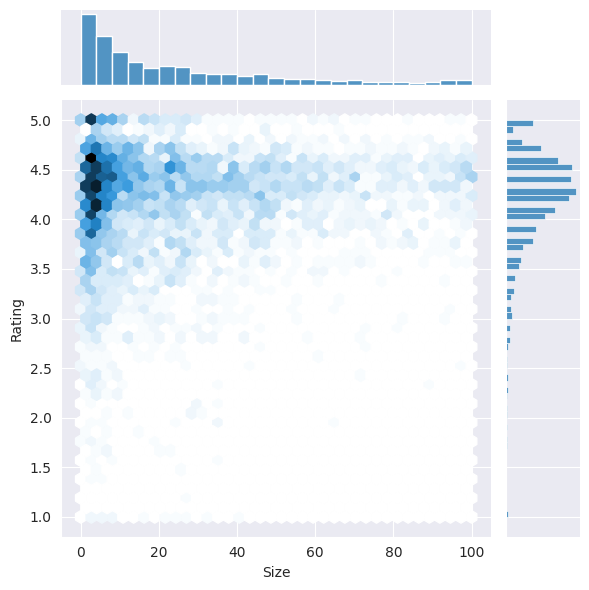

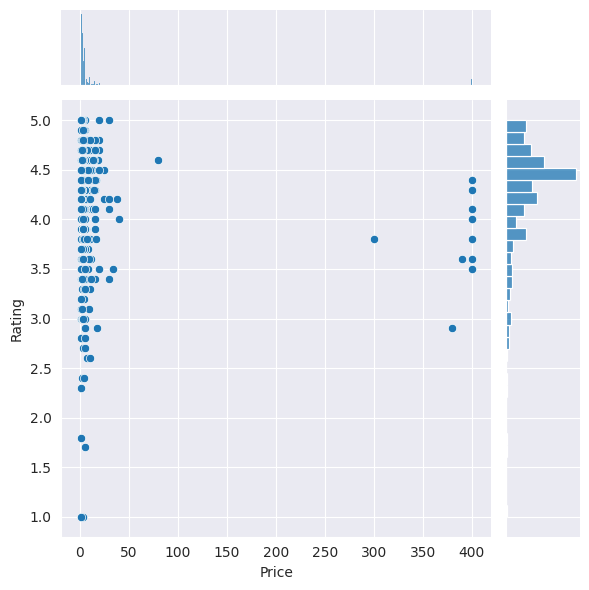

In [24]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
#subset for
large_categories=apps.groupby('Category').filter(lambda x: len(x) >= 250).reset_index()


plt1=sns.jointplot(x=large_categories['Size'], y=large_categories['Rating'], kind='hex')

paid_apps=apps[apps['Type']=='Paid']

plt2=sns.jointplot(x=paid_apps['Price'], y=paid_apps['Rating'])

Text(0.5, 1.0, 'App pricing trend across categories')

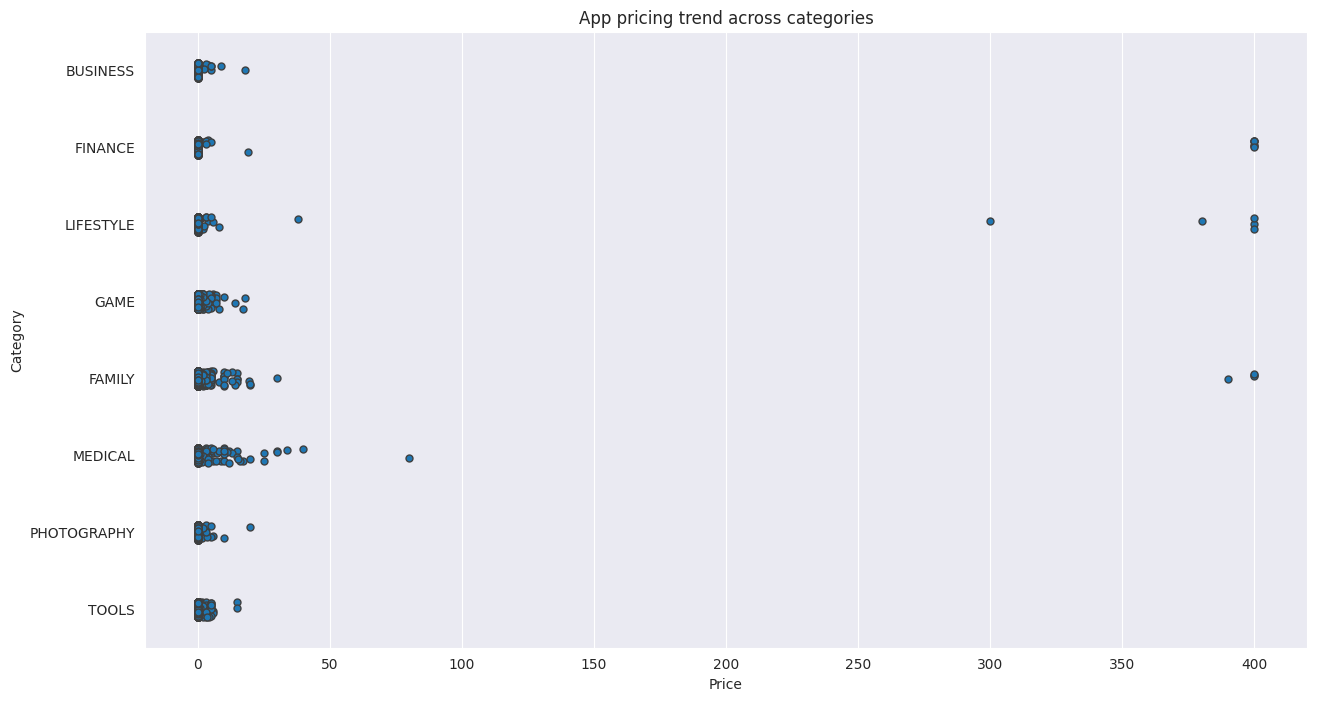

In [25]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
fig.set_size_inches(15,8)

popular_app_cats=apps[apps.Category.isin(['GAME','FAMILY','PHOTOGRAPHY','MEDICAL','TOOLS','FINANCE','LIFESTYLE','BUSINESS'])]

ax=sns.stripplot(x=popular_app_cats['Price'], y=popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

In [26]:
trace0=go.Box(
    y=apps[apps['Type']=='Paid']['Installs'],
    name='Paid'
)

trace1=go.Box(
    y=apps[apps['Type']=='Free']['Installs'],
    name='Free'
)

layout=go.Layout(
    title="Number of downloads of paid apps vs. free apps",
    yaxis=dict(
    type='log',
    autorange=True
    )

)

In [28]:
data=[trace0,trace1]
plotly.offline.iplot({'data':data, 'layout':layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

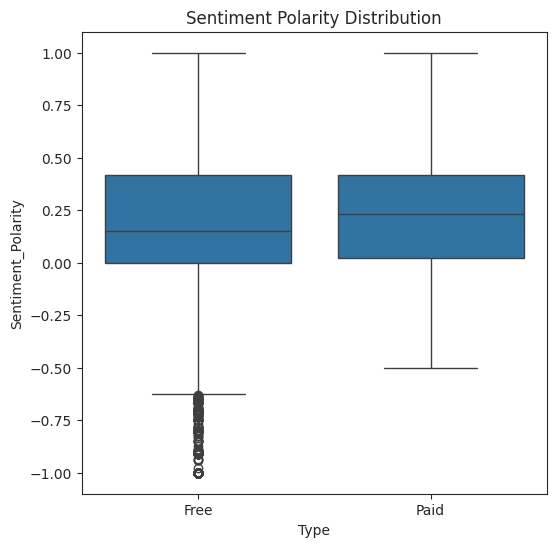

In [30]:
reviews_df=pd.read_csv('user_reviews.csv')

merged_df=pd.merge(apps,reviews_df,on='App',how="inner")

merged_df=merged_df.dropna(subset=['Sentiment','Translated_Review'])

sns.set_style('ticks')
fig, ax=plt.subplots()
fig.set_size_inches(6,6)

ax=sns.boxplot(x=merged_df['Type'], y=merged_df['Sentiment_Polarity'])
ax.set_title('Sentiment Polarity Distribution')

In [31]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [33]:
selected_df=merged_df[['App','Category','Rating','Reviews','Installs','Type','Translated_Review','Sentiment']]

In [35]:
selected_df[['App','Category','Type','Sentiment']]=selected_df[['App','Category','Type','Sentiment']].apply( LabelEncoder().fit_transform)

<ipython-input-35-ae5ea1b5e58a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
selected_df.head()

,App,Category,Rating,Reviews,Installs,Type,Translated_Review,Sentiment
0,259,0,3.9,967,500000,0,A kid's excessive ads. The types ads allowed a...,0
1,259,0,3.9,967,500000,0,It bad >:(,0
2,259,0,3.9,967,500000,0,like,1
4,259,0,3.9,967,500000,0,I love colors inspyering,2
5,259,0,3.9,967,500000,0,I hate,0


In [38]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
selected_df["Translated_Review"] = selected_df["Translated_Review"].apply(clean)

<ipython-input-38-65296be04809>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
selected_df.head()

,App,Category,Rating,Reviews,Installs,Type,Translated_Review,Sentiment
0,259,0,3.9,967,500000,0,kid excess ad type ad allow app let alon kid,0
1,259,0,3.9,967,500000,0,bad,0
2,259,0,3.9,967,500000,0,like,1
4,259,0,3.9,967,500000,0,love color inspyer,2
5,259,0,3.9,967,500000,0,hate,0


In [40]:
selected_df['Translated_Review']

0             kid excess ad type ad allow app let alon kid
1                                                     bad 
2                                                     like
4                                       love color inspyer
5                                                     hate
                               ...                        
41145    turn better expect tbh im glad im hook think p...
41146    like apart n stuff minus player mani new playe...
41147    hey ive play year half last year took  month m...
41148    annoy load stop  percent data high speed someb...
41149    bore graphic great although prais somewhat lik...
Name: Translated_Review, Length: 24069, dtype: object

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer(analyzer='word' , stop_words='english',  use_idf=True, smooth_idf=True, sublinear_tf=False)

In [42]:
tfidf_vect.fit(selected_df["Translated_Review"].values)
X = tfidf_vect.transform(selected_df["Translated_Review"].values)
y = selected_df['Sentiment'].values

In [45]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
model=RandomForestClassifier()

In [47]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_predict=model.predict(X_test)

In [50]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81      1070
           1       0.79      0.79      0.79       662
           2       0.89      0.96      0.92      3082

    accuracy                           0.88      4814
   macro avg       0.87      0.82      0.84      4814
weighted avg       0.89      0.88      0.88      4814



In [52]:
cnf_matrix = confusion_matrix(y_test,y_predict)
cnf_matrix

array([[ 757,   48,  265],
       [  17,  526,  119],
       [  29,   88, 2965]])

In [53]:
cm_df = pd.DataFrame(cnf_matrix,
                     index = ['Negative','Neutral','Positive'],
                     columns = ['Negative','Neutral','Positive'])

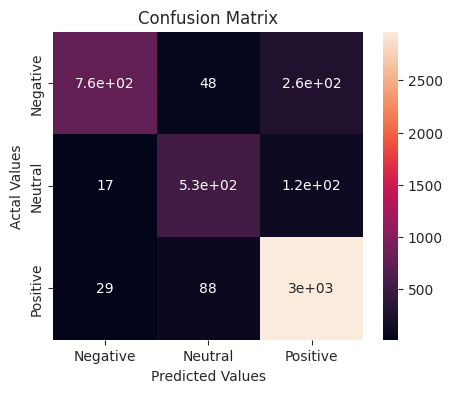

In [54]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [55]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.3 MB/s 

In [58]:
import gradio as gr

def tweetdata(user):
    sample = user
    data = tfidf_vect.transform([sample]).toarray()
    a = model.predict(data)
    if a == 0:
        out ='Negative'
    elif a == 1:
        out ='Neutral'
    elif a == 2:
        out ='Positive'
    return out

demo = gr.Interface(fn=tweetdata, inputs="text", outputs="text")

In [57]:
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b47756135ef4323d7d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
